In [422]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [423]:
df = pd.read_csv('C:/Users/Frank/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 31/Raisin_Dataset.csv')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [424]:
df2 = df.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 900
Total de variables disponibles (columnas) = 8 
Columnas que cuentan con un valor nulo -
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [425]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [426]:
df2['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [427]:
dicc = {'Kecimen':1,'Besni':0}
df2['Class'] = df2['Class'].map(dicc)

In [428]:
df2.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


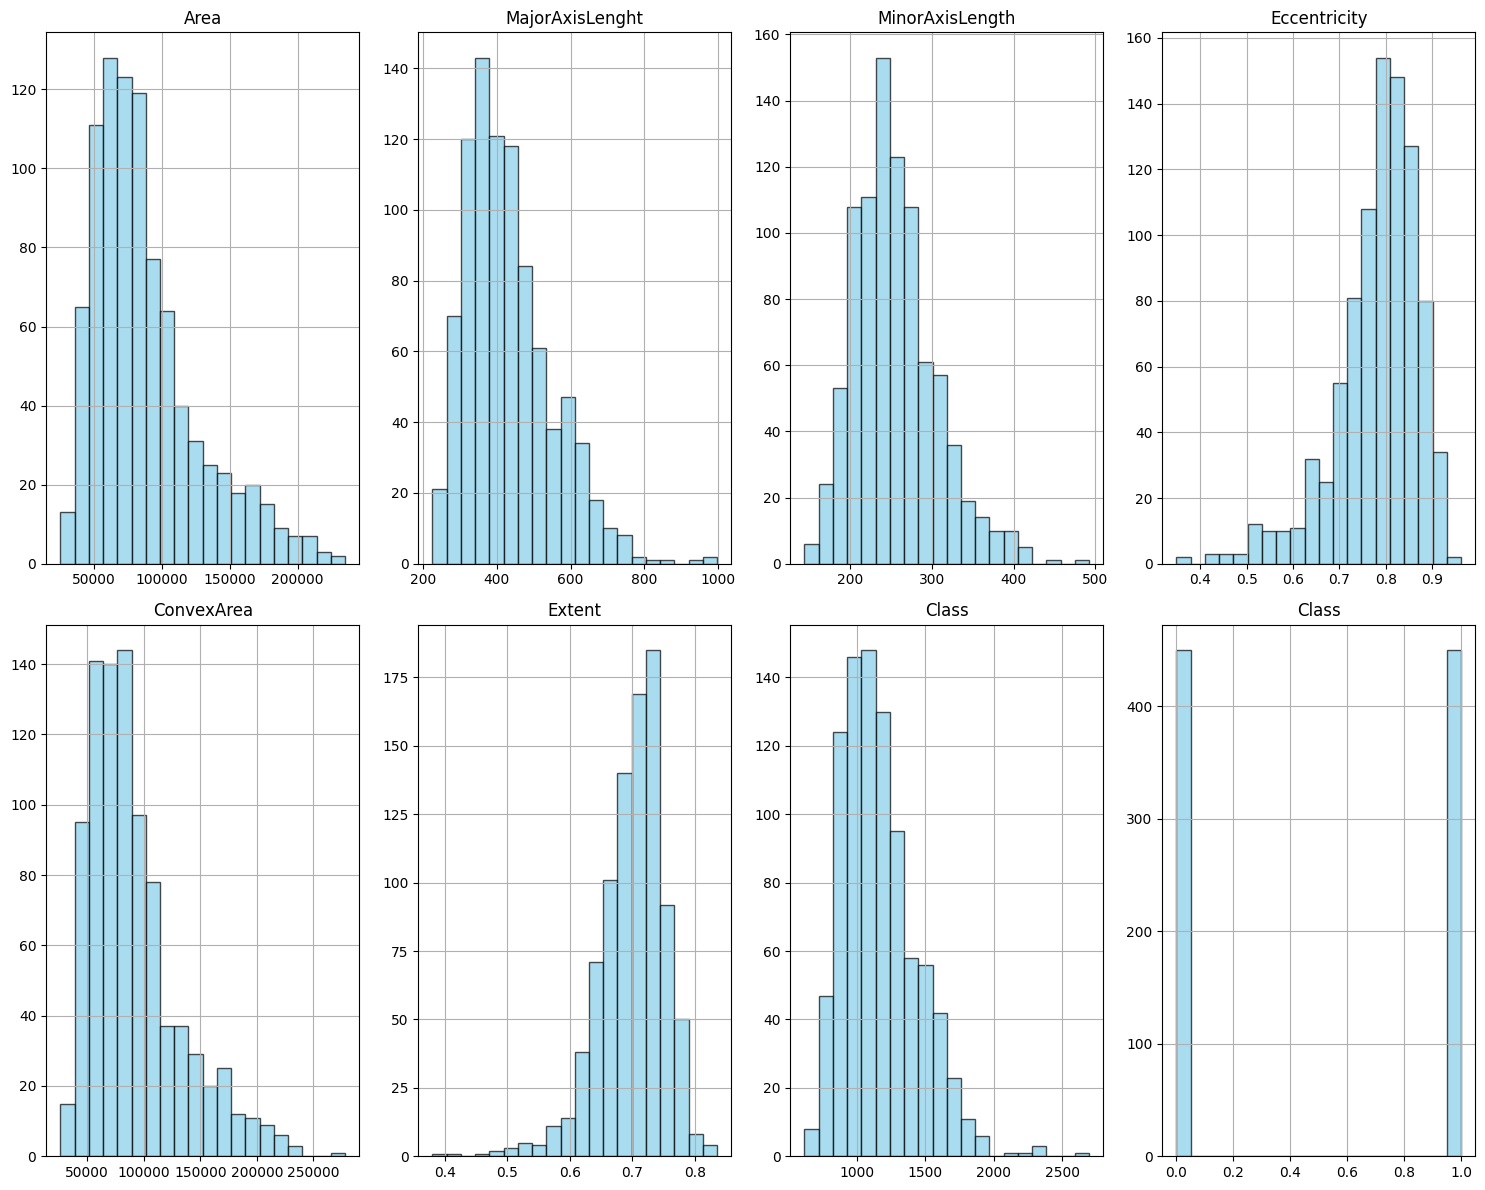

In [429]:
# Crear histogramas mejorados
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 12))
df2.hist(ax=axes, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Añadir títulos a cada subgráfico
axes[0, 0].set_title('Area')
axes[0, 1].set_title('MajorAxisLenght')
axes[0, 2].set_title('MinorAxisLength')
axes[0, 3].set_title('Eccentricity')
axes[1, 0].set_title('ConvexArea')
axes[1, 1].set_title('Extent')
axes[1, 2].set_title('Perimeter')
axes[1, 2].set_title('Class')

# Asegurarse de que los títulos se muestren correctamente
plt.tight_layout()
plt.show()

# Escalar los datos

In [430]:
# Definir características numéricas y categóricas

numeric_features = ['MajorAxisLength','MinorAxisLength','ConvexArea','Perimeter',]

In [431]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])

In [432]:
df2.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,0.097577,-0.023958,0.819738,-0.015709,0.758651,0.066274,1
1,75166,-0.209012,-0.229292,0.801805,-0.304248,0.684130,-0.161252,1
2,90856,0.097758,0.236988,0.798354,0.062113,0.637613,0.155945,1
3,45928,-1.245051,-0.915273,0.684989,-1.076165,0.699599,-1.175915,1
4,79408,-0.678958,0.727354,0.564011,-0.238623,0.792772,-0.338639,1


# Redes Neuronales

In [433]:
# Definir X e y
X = df2.drop(columns=['Area','Class'])
y = df2['Class']

In [434]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [435]:
oculta = tf.keras.layers.Dense(units=32, activation='relu', input_shape=[X_train.shape[1]])
dropout = tf.keras.layers.Dropout(0.3)
oculta1 = tf.keras.layers.Dense(units=16,activation='relu')
dropout1 = tf.keras.layers.Dropout(0.3)
salida = tf.keras.layers.Dense(units=1, activation='sigmoid')
modelo = tf.keras.Sequential([oculta,dropout,oculta1,dropout1,salida])

In [436]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [437]:
# Implementar el early_stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [438]:
# Entrenar modelo
print('Entrenando Modelo')
historial = modelo.fit(X_train,y_train,epochs=1000,batch_size=16,verbose=False,validation_split=0.2,callbacks=[early_stopping])
print('Modelo entrenado')

Entrenando Modelo
Modelo entrenado


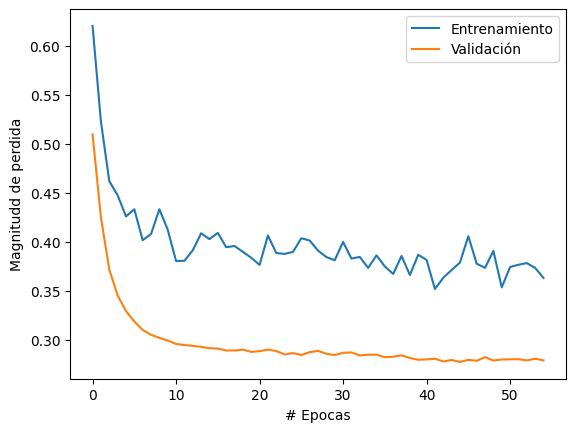

In [439]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitudd de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
plt.legend(['Entrenamiento','Validación'])

In [440]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70,0,0]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :4] = scaler.transform(nuevo_dato[:, :4])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [441]:
# Convertir la probabilidad a una predicción binaria
prediccion_binaria = (resultado > 0.5).astype(int)

# Imprimir el resultado y la predicción
print(f'El resultado es: {prediccion_binaria[0][0]}')
if prediccion_binaria[0][0] == 0:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 0, es Besni')
else:
    print(f'El resultado es: {prediccion_binaria[0][0]}, predicción: 1, es Kecimen')

El resultado es: 1
El resultado es: 1, predicción: 1, es Kecimen


In [442]:
# Realizar predicciones usando el modelo entrenado
predicciones = modelo.predict(X)

predicciones_binarias = (predicciones > 0.5).astype(int).flatten()

df2['Class_pred'] = predicciones_binarias

# Verificar las primeras filas del DataFrame con las predicciones
print(df2.head())

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524         0.097577        -0.023958      0.819738   -0.015709   
1  75166        -0.209012        -0.229292      0.801805   -0.304248   
2  90856         0.097758         0.236988      0.798354    0.062113   
3  45928        -1.245051        -0.915273      0.684989   -1.076165   
4  79408        -0.678958         0.727354      0.564011   -0.238623   

     Extent  Perimeter  Class  Class_pred  
0  0.758651   0.066274      1           0  
1  0.684130  -0.161252      1           1  
2  0.637613   0.155945      1           0  
3  0.699599  -1.175915      1           1  
4  0.792772  -0.338639      1           1  


In [443]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Realizar predicciones en el conjunto de prueba
y_pred_probs = modelo.predict(X_test).flatten()  # Obtener probabilidades
y_pred = (y_pred_probs > 0.5).astype(int)  # Convertir a predicciones binarias

# Calcular precisión, exhaustividad y F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcular AUC - ROC
auc = roc_auc_score(y_test, y_pred_probs)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precisión: {precision:.2f}')
print(f'Exhaustividad: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC - ROC: {auc:.2f}')
print('Matriz de Confusión:')
print(conf_matrix)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Precisión: 0.86
Exhaustividad: 0.86
F1 Score: 0.86
AUC - ROC: 0.93
Matriz de Confusión:
[[73 13]
 [13 81]]


In [444]:
# Comparar las predicciones con los valores reales
correct_prediction = (df2['Class'] == df2['Class_pred']).sum()

In [445]:
total_predicciones = len(df2)
precisión = (correct_prediction / total_predicciones) * 100
print(f'Precisión: {precisión:.2f}%')

margen_de_error = 100 - precisión
print(f'Margen de error: {margen_de_error:.2f}%')

Precisión: 86.56%
Margen de error: 13.44%


In [446]:
df2['Class_pred'].value_counts()

Class_pred
1    487
0    413
Name: count, dtype: int64

In [447]:
df2['Class'].value_counts()

Class
1    450
0    450
Name: count, dtype: int64